Capstone Project

In [161]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from fbprophet import Prophet
from pytrends.request import TrendReq
from LSTM import preprocess_DATA, build_LSTM, predict_MODEL, build_GRU
import datetime
import time
import tensorflow as tf
np.random.seed(1)
tf.set_random_seed(1)

warnings.filterwarnings("ignore", category=DeprecationWarning) 
mpl.style.use('seaborn')
scaler = MinMaxScaler(feature_range = (-1,1))

In [162]:
curr = {}

curr['Bitcoin'] = pd.read_csv('C:/Users/Dassy/Desktop/MLND/Projects/Capstone/Project/data/bitcoin_price.csv')
curr['Ripple'] = pd.read_csv('C:/Users/Dassy/Desktop/MLND/Projects/Capstone/Project/data/ripple_price.csv')
curr['Ethereum'] = pd.read_csv('C:/Users/Dassy/Desktop/MLND/Projects/Capstone/Project/data/ethereum_price.csv')

In [163]:
#converting date to datetime format, reindexing values
for coin in curr:
 curr[coin]['Date'] = pd.to_datetime(curr[coin]['Date']) 
 print(coin, "dataset has a shape of {} and {}".format(*curr[coin].shape))


Bitcoin dataset has a shape of 1655 and 7
Ripple dataset has a shape of 1557 and 7
Ethereum dataset has a shape of 824 and 7


In [164]:
#Remove all columms except close and date,take the most recent values and reindex
for coin in curr:
    for column in curr[coin].columns:
        if column not in ['Date', 'Close']:
            curr[coin] = curr[coin].drop(column, 1)
    curr[coin] = curr[coin][:824]
    print(coin, "has a new dataset shape of {} and {}".format(*curr[coin].shape))

Bitcoin has a new dataset shape of 824 and 2
Ripple has a new dataset shape of 824 and 2
Ethereum has a new dataset shape of 824 and 2


In [165]:
#set date as index of dataframe
for coin in curr:
    curr[coin] = curr[coin].set_index(curr[coin]['Date'])
    curr[coin] = curr[coin].drop('Date', 1)
    curr[coin] = curr[coin].iloc[::-1]

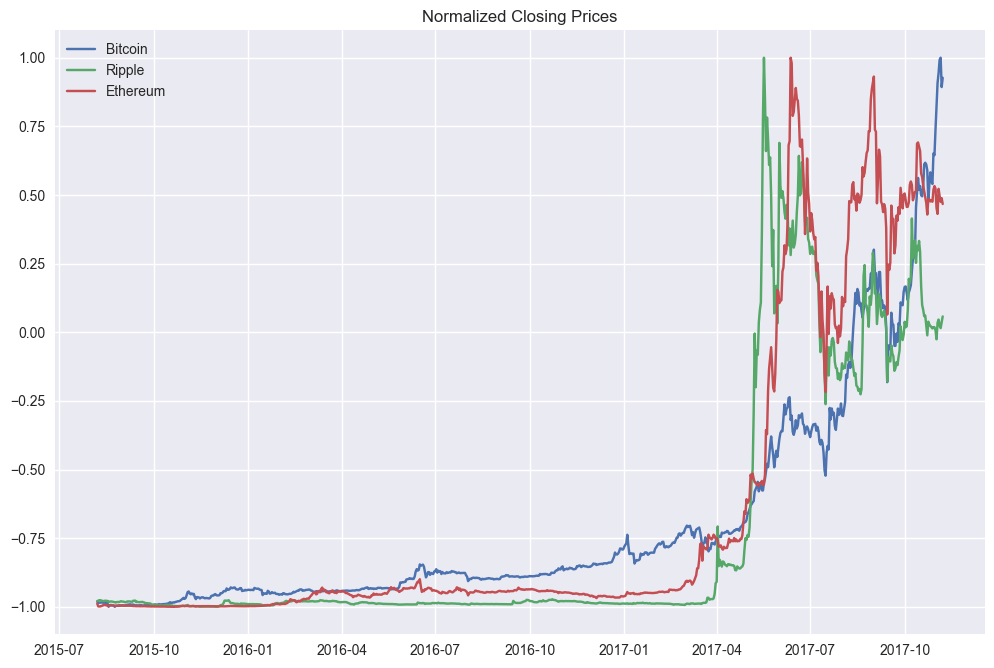

In [166]:
#scale closing prices for comparative price change
plt.figure(num=1, figsize=(12, 8), dpi=100)
scaled = {}
for coin in curr:
    scaled[coin] = scaler.fit_transform(curr[coin]['Close'])
    plt.plot(curr[coin].index.to_pydatetime(),scaled[coin], label=coin)
    plt.legend(loc=2)
    plt.title('Normalized Closing Prices')
plt.show()

In [167]:
# Add a column for percent change
for coin in curr:
    curr[coin]['ClosePctChg'] = curr[coin]['Close'].pct_change().fillna(0)

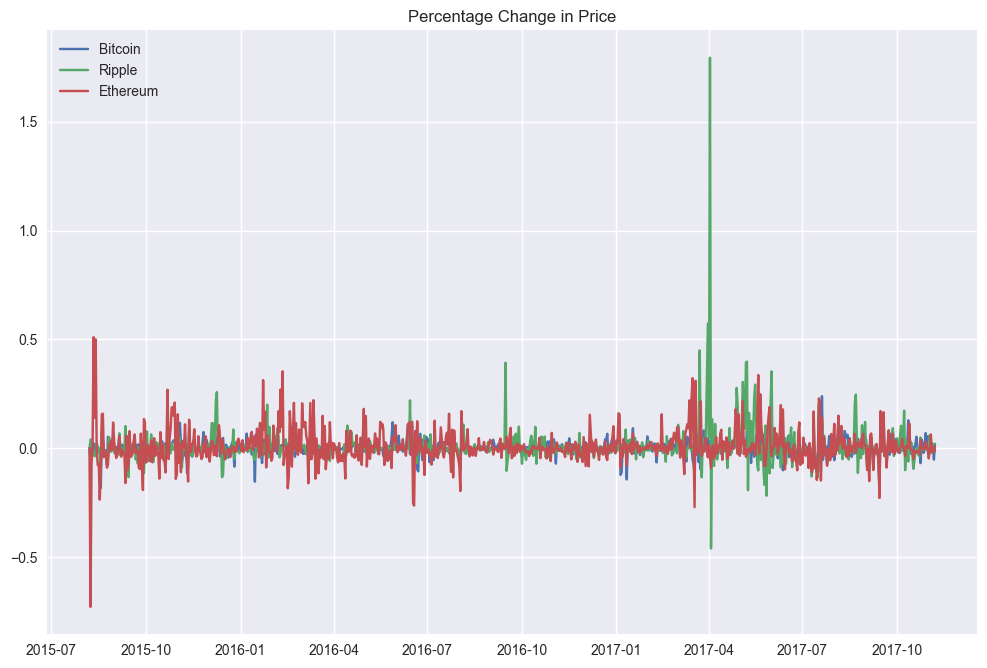

In [168]:
plt.figure(num=1, figsize=(12, 8), dpi=100)
for coin in curr:        
    plt.plot(curr[coin].index.to_pydatetime(),curr[coin]['ClosePctChg'], label=coin)
    plt.legend(loc=2)
    plt.title('Percentage Change in Price')
plt.show()

In [169]:
#remove all columns except close and date for fb prophet forecaster
for coin in curr:
    for column in curr[coin].columns:
        if column not in ['Date', 'Close']:
            curr[coin] = curr[coin].drop(column,1)
    curr[coin].reset_index(inplace=True)

In [170]:
for coin in curr:
    curr[coin].columns = ["ds", "y"]
m = Prophet()
m.fit(curr['Ripple']);
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1184,2018-11-03,0.336447,0.104164,0.531243
1185,2018-11-04,0.337555,0.099148,0.536258
1186,2018-11-05,0.338148,0.107499,0.544294
1187,2018-11-06,0.339288,0.097548,0.535137
1188,2018-11-07,0.340568,0.109780,0.542792


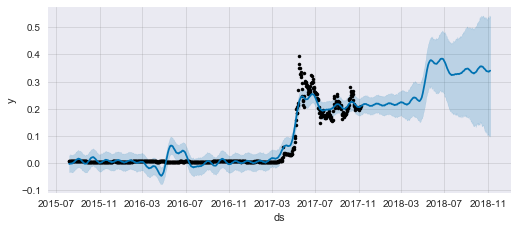

In [171]:
m.plot(forecast)

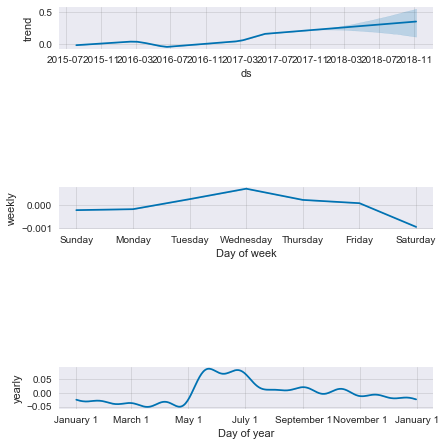

In [172]:
m.plot_components(forecast)

In [173]:
for coin in curr:
    curr[coin].columns = ["ds", "y"]
m = Prophet()
m.fit(curr['Bitcoin']);
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1184,2018-11-03,15270.001398,13295.151924,17174.673380
1185,2018-11-04,15290.329706,13297.207443,17147.826942
1186,2018-11-05,15317.835834,13251.544709,17269.618262
1187,2018-11-06,15336.381174,13336.807588,17217.217195
1188,2018-11-07,15348.432649,13301.786540,17236.425078


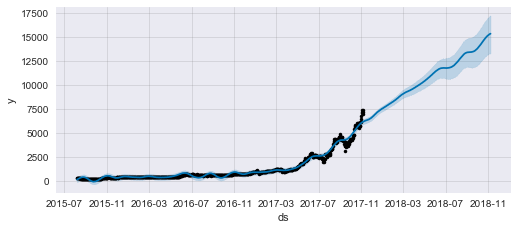

In [174]:
m.plot(forecast)

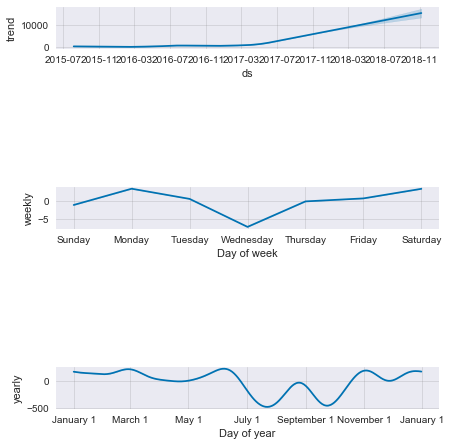

In [175]:
m.plot_components(forecast)

In [176]:
for coin in curr:
    curr[coin].columns = ["ds", "y"]
m = Prophet()
m.fit(curr['Ethereum']);
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1184,2018-11-03,694.977800,509.395181,873.223741
1185,2018-11-04,695.724660,508.759911,868.215922
1186,2018-11-05,697.015695,513.089512,873.343218
1187,2018-11-06,698.516955,515.306463,873.463211
1188,2018-11-07,699.489670,508.152751,881.236385


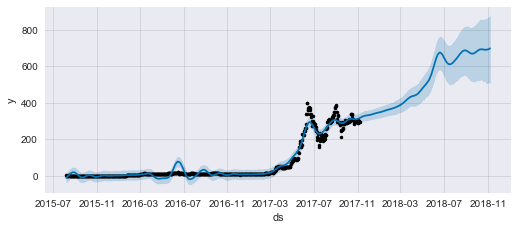

In [177]:
m.plot(forecast)

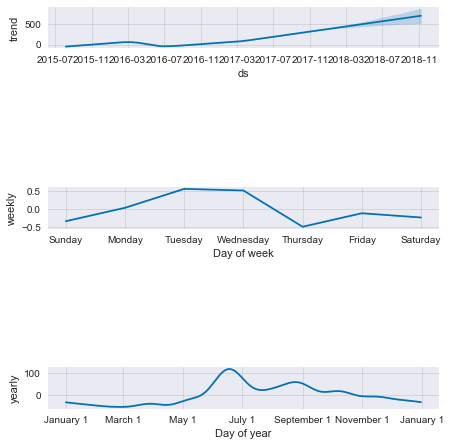

In [178]:
m.plot_components(forecast)

In [179]:
curr = {}

curr['Bitcoin'] = pd.read_csv('C:/Users/Dassy/Desktop/MLND/Projects/Capstone/Project/data/bitcoin_price.csv')
curr['Ripple'] = pd.read_csv('C:/Users/Dassy/Desktop/MLND/Projects/Capstone/Project/data/ripple_price.csv')
curr['Ethereum'] = pd.read_csv('C:/Users/Dassy/Desktop/MLND/Projects/Capstone/Project/data/ethereum_price.csv')

#converting date to datetime format, reindexing values
for coin in curr:
 curr[coin]['Date'] = pd.to_datetime(curr[coin]['Date']) 
 print(coin, "dataset has a shape of {} and {}".format(*curr[coin].shape))

Bitcoin dataset has a shape of 1655 and 7
Ripple dataset has a shape of 1557 and 7
Ethereum dataset has a shape of 824 and 7


In [181]:

pytrends = TrendReq(hl='en-US', tz=604)
kw_list = ["Ripple" or "XRP"]    
    
pytrends.build_payload(kw_list, cat=0, timeframe='2017-05-07 2017-11-07')
pydf1 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2016-11-06 2017-05-06')
pydf2 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2016-05-05 2016-11-05')
pydf3 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2015-11-04 2016-05-04')
pydf4 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe= '2015-05-03 2015-11-03')
pydf5 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2014-11-02 2015-05-02')
pydf6 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2014-05-01 2014-11-01')
pydf7 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2013-10-30 2014-04-30')
pydf8 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2013-08-04 2013-10-29')
pydf9 = pytrends.interest_over_time()


pydf=pd.concat([pydf9,pydf8,pydf7,pydf6,pydf5,pydf4,pydf3,pydf2,pydf1])
pydf.drop('isPartial', axis=1, inplace=True)
pydf.columns=['Trend(XRP)']   
pydf.reset_index(inplace=True)

In [182]:
for coin in curr:
    curr[coin] = curr[coin].iloc[::-1]
    curr[coin].reset_index(inplace=True)
    curr[coin]= curr[coin].drop(['index','Market Cap', 'Volume'],axis = 1)

C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


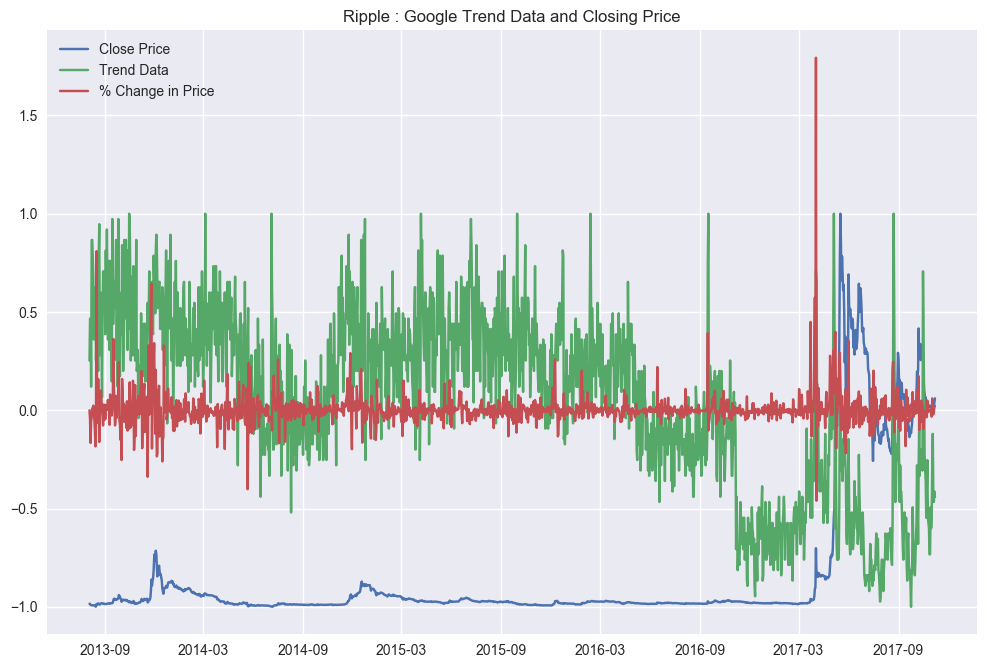

In [184]:
plt.figure(num=1, figsize=(12, 8), dpi=100)
rippledf = pd.concat([curr['Ripple'],pydf], axis=1, join='inner')
rippledf['ClosePctChg'] = rippledf['Close'].pct_change().fillna(0)
plt.figure(num=1, figsize=(8, 8), dpi=80)
rippledf = rippledf.set_index('Date')
rippledf = rippledf.drop(columns=['date'])
plt.plot(rippledf.index.to_pydatetime(),scaler.fit_transform(rippledf['Close']), label = 'Close Price')
plt.plot(rippledf.index.to_pydatetime(),scaler.fit_transform(rippledf['Trend(XRP)']), label = 'Trend Data')
plt.plot(rippledf.index.to_pydatetime(),rippledf['ClosePctChg'], label = '% Change in Price')
plt.legend(loc=2)
plt.title('Ripple : Google Trend Data and Closing Price')
plt.show()

In [185]:
pytrends = TrendReq(hl='en-US', tz=604)
kw_list = ["Bitcoin" or "BTC"]    
    
pytrends.build_payload(kw_list, cat=0, timeframe='2017-05-07 2017-11-07')
pydf1 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2016-11-06 2017-05-06')
pydf2 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2016-05-05 2016-11-05')
pydf3 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2015-11-04 2016-05-04')
pydf4 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe= '2015-05-03 2015-11-03')
pydf5 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2014-11-02 2015-05-02')
pydf6 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2014-05-01 2014-11-01')
pydf7 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2013-10-30 2014-04-30')
pydf8 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2013-04-28 2013-10-29')
pydf9 = pytrends.interest_over_time()


pydf=pd.concat([pydf9,pydf8,pydf7,pydf6,pydf5,pydf4,pydf3,pydf2,pydf1])
pydf.drop('isPartial', axis=1, inplace=True)
pydf.columns=['Trend(BTC)']   
pydf.reset_index(inplace=True)

C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


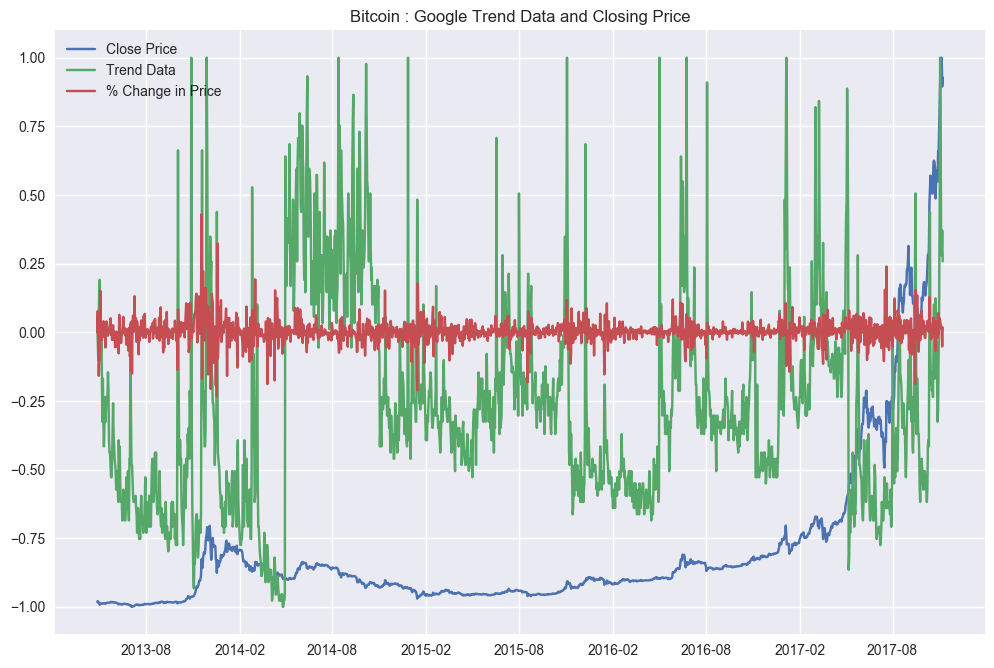

In [186]:
plt.figure(num=1, figsize=(12, 8), dpi=100)
bitcoindf = pd.concat([curr['Bitcoin'],pydf], axis=1, join='inner')
bitcoindf['ClosePctChg'] = bitcoindf['Close'].pct_change().fillna(0)

plt.figure(num=1, figsize=(8, 8), dpi=80)
bitcoindf = bitcoindf.set_index('Date')
bitcoindf = bitcoindf.drop(columns=['date'])
plt.plot(bitcoindf.index.to_pydatetime(),scaler.fit_transform(bitcoindf['Close']), label = 'Close Price')
plt.plot(bitcoindf.index.to_pydatetime(),scaler.fit_transform(bitcoindf['Trend(BTC)']), label = 'Trend Data')
plt.plot(bitcoindf.index.to_pydatetime(),bitcoindf['ClosePctChg'], label = '% Change in Price')
plt.legend(loc=2)
plt.title('Bitcoin : Google Trend Data and Closing Price')
plt.show()

In [187]:
pytrends = TrendReq(hl='en-US', tz=604)
kw_list = ["Ethereum" or "ETHER"]    
    
pytrends.build_payload(kw_list, cat=0, timeframe='2017-05-07 2017-11-07')
pydf1 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2016-11-06 2017-05-06')
pydf2 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2016-05-05 2016-11-05')
pydf3 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe='2015-11-04 2016-05-04')
pydf4 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=0, timeframe= '2015-08-07 2015-11-03')
pydf5 = pytrends.interest_over_time()


pydf=pd.concat([pydf5,pydf4,pydf3,pydf2,pydf1])
pydf.drop('isPartial', axis=1, inplace=True)
pydf.columns=['Trend(ETH)']   
pydf.reset_index(inplace=True)

C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


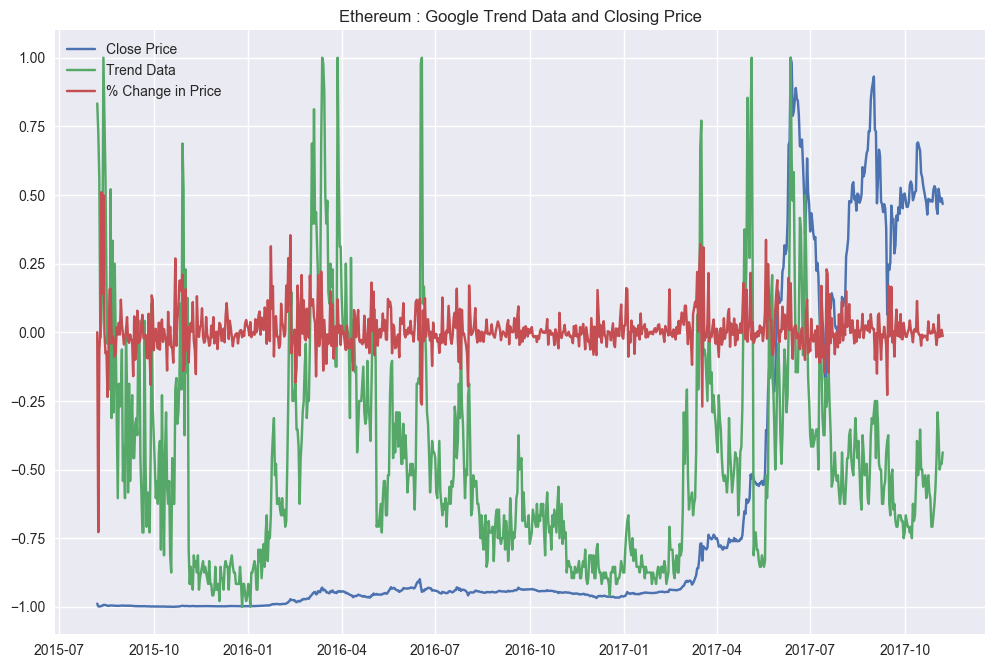

In [188]:
plt.figure(num=1, figsize=(12, 8), dpi=100)
ethereumdf = pd.concat([curr['Ethereum'],pydf], axis=1, join='inner')
ethereumdf['ClosePctChg'] = ethereumdf['Close'].pct_change().fillna(0)

plt.figure(num=1, figsize=(8, 8), dpi=80)
ethereumdf = ethereumdf.set_index('Date')
ethereumdf = ethereumdf.drop(columns=['date'])
plt.plot(ethereumdf.index.to_pydatetime(),scaler.fit_transform(ethereumdf['Close']), label = 'Close Price')
plt.plot(ethereumdf.index.to_pydatetime(),scaler.fit_transform(ethereumdf['Trend(ETH)']), label = 'Trend Data')
plt.plot(ethereumdf.index.to_pydatetime(),ethereumdf['ClosePctChg'], label = '% Change in Price')

plt.legend(loc=2)
plt.title('Ethereum : Google Trend Data and Closing Price')
plt.show()

In [189]:
eth_corr = ethereumdf['Close'].corr(ethereumdf['Trend(ETH)'])
xrp_corr= rippledf['Close'].corr(rippledf['Trend(XRP)'])
btc_corr = bitcoindf['Close'].corr(bitcoindf['Trend(BTC)'])
print('The Correlations between Close price and Google Trend data are\nEthereum {}\nRipple {}\nBitcoin {}'.format(eth_corr,xrp_corr,btc_corr))


The Correlations between Close price and Google Trend data are
Ethereum 0.14610212494653355
Ripple -0.4466217271206601
Bitcoin 0.043067751732835474


In [190]:
ethereumdf.to_csv('ethereumdf.csv')
rippledf.to_csv('rippledf.csv')
bitcoindf.to_csv('bitcoindf.csv')

In [6]:
dataset = pd.read_csv('ethereumdf.csv', index_col ='Date')
dataset.head()

,Open,High,Low,Close,Trend(ETH),ClosePctChg
Date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,75,0.000000
2015-08-08,2.790000,2.800000,0.714725,0.753325,92,-0.728042
2015-08-09,0.706136,0.879810,0.629191,0.701897,76,-0.068268
2015-08-10,0.713989,0.729854,0.636546,0.708448,57,0.009333
2015-08-11,0.708087,1.130000,0.663235,1.070000,60,0.510344


In [112]:
#Pad the predictions with NAN values for plotting
def pad_shape(predictions, train_size,Pred_days_ahead):
    pred = np.reshape(predictions,(1,-1))
    pred = pred.flatten()
    zero= np.zeros(train_size+Pred_days_ahead)
    zero.fill(np.nan)
    pred = np.concatenate((zero,pred),axis=0)
    return(pred)

#Plot predictions and ground truth
def model_plot(name, pred1,pred2, time1,time2, dataset,et1,et2):
    plt.figure(num=1, figsize=(12, 8), dpi=80)
    plt.axvline(x=pd.to_datetime(dataset.index[train_size+Pred_days_ahead]), color = 'grey', linestyle = 'dashed', linewidth = 3, label = 'Prediction Line')
    plt.plot(dataset.index.to_datetime(),dataset.iloc[:,0:1], color = 'black')
    plt.plot(dataset.index.to_datetime(),pred1, color = 'red')
    plt.plot(dataset.index.to_datetime(),pred2, color = 'blue')
    plt.xlim(pd.Timestamp(time1), pd.Timestamp(time2))
    red_patch = mpatches.Patch(color='red', label='LSTM Predictions')
    blue_patch = mpatches.Patch(color='blue', label='GRU Predictions')
    black_patch = mpatches.Patch(color='black', label='Ground Truth')
    grey_patch = mpatches.Patch(color='grey', label='Prediction Line')
    x_patch = mpatches.Patch(color='white',label='LSTM Train time {:.2f} seconds'.format(et1))
    y_patch = mpatches.Patch(color='white',label='GRU Train time {:.2f} seconds'.format(et2))
    plt.legend(handles=[red_patch,blue_patch, black_patch, grey_patch, x_patch, y_patch], loc=2)
    
    plt.title('{} Model Prediction'.format(name))
    plt.show()

#Tune the model for Epoch and Batch size, score using RMSE
def tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model):
    rmse_list = []
    for i in epochs:
        for x in batch_size:
            model.fit(X_train, y_train, epochs = i, batch_size = x, verbose = 0)
            predictions_eth_LSTM, ground_truth_eth_LSTM, RMSE = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
            rmse_list.append(RMSE)
    return rmse_list



In [113]:
timestep = 50 #number of days previous to feed into RNN
Pred_days_ahead = 5 # Number of days ahead of last timestep
Train = .94 # train/test split ratio
layers = [50, 100, 100, 100, 1] #

batch_size = [56, 186, 396]
epochs = [5,25,50]

In [14]:
dataset = pd.read_csv('ethereumdf.csv', index_col ='Date')
train_size = int(dataset.shape[0]*Train)

X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_LSTM(layers, Pred_days_ahead, X_train)

grid_results = tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model)
count = 0
for i in epochs:
    for x in batch_size:
        print('Epoch: {} and Batch_Size: {} RMSE = {}'.format(i, x, grid_results[count]))
        count += 1

The RMSE for Prediction is 0.05
The RMSE for Prediction is 0.05
The RMSE for Prediction is 0.05
The RMSE for Prediction is 0.06
The RMSE for Prediction is 0.08
The RMSE for Prediction is 0.08
The RMSE for Prediction is 0.09
The RMSE for Prediction is 0.09
The RMSE for Prediction is 0.09
Epoch: 5 and Batch_Size: 56 RMSE = 0.045459820276803835
Epoch: 5 and Batch_Size: 186 RMSE = 0.04687828805996267
Epoch: 5 and Batch_Size: 396 RMSE = 0.05292969297277525
Epoch: 25 and Batch_Size: 56 RMSE = 0.05573251832986866
Epoch: 25 and Batch_Size: 186 RMSE = 0.08405980624921425
Epoch: 25 and Batch_Size: 396 RMSE = 0.08488166384620466
Epoch: 50 and Batch_Size: 56 RMSE = 0.09192115286753125
Epoch: 50 and Batch_Size: 186 RMSE = 0.08922225244806314
Epoch: 50 and Batch_Size: 396 RMSE = 0.08985141123107433


In [15]:
X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_GRU(layers, Pred_days_ahead, X_train)

grid_results = tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model)
count = 0
for i in epochs:
    for x in batch_size:
        print('Epoch: {} and Batc_Size: {} RMSE = {}'.format(i, x, grid_results[count]))
        count += 1

The RMSE for Prediction is 0.32
The RMSE for Prediction is 0.19
The RMSE for Prediction is 0.23
The RMSE for Prediction is 0.06
The RMSE for Prediction is 0.06
The RMSE for Prediction is 0.04
The RMSE for Prediction is 0.04
The RMSE for Prediction is 0.04
The RMSE for Prediction is 0.04
Epoch: 5 and Batc_Size: 56 RMSE = 0.3229572340441296
Epoch: 5 and Batc_Size: 186 RMSE = 0.18916703882327313
Epoch: 5 and Batc_Size: 396 RMSE = 0.2279819164813522
Epoch: 25 and Batc_Size: 56 RMSE = 0.06034662966065148
Epoch: 25 and Batc_Size: 186 RMSE = 0.06396708213124351
Epoch: 25 and Batc_Size: 396 RMSE = 0.04425585277143549
Epoch: 50 and Batc_Size: 56 RMSE = 0.04024014715429482
Epoch: 50 and Batc_Size: 186 RMSE = 0.0411107928383769
Epoch: 50 and Batc_Size: 396 RMSE = 0.042699556091298864


In [16]:
dataset = pd.read_csv('rippledf.csv', index_col ='Date')
train_size = int(dataset.shape[0]*Train)

X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_LSTM(layers, Pred_days_ahead, X_train)

grid_results = tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model)
count = 0
for i in epochs:
    for x in batch_size:
        print('Epoch: {} and Batch_Size: {} RMSE = {}'.format(i, x, grid_results[count]))
        count += 1

The RMSE for Prediction is 0.11
The RMSE for Prediction is 0.14
The RMSE for Prediction is 0.15
The RMSE for Prediction is 0.17
The RMSE for Prediction is 0.18
The RMSE for Prediction is 0.18
The RMSE for Prediction is 0.17
The RMSE for Prediction is 0.23
The RMSE for Prediction is 0.21
Epoch: 5 and Batch_Size: 56 RMSE = 0.10844936316685415
Epoch: 5 and Batch_Size: 186 RMSE = 0.14382709217133957
Epoch: 5 and Batch_Size: 396 RMSE = 0.1482580729811822
Epoch: 25 and Batch_Size: 56 RMSE = 0.16635767526058112
Epoch: 25 and Batch_Size: 186 RMSE = 0.17897259783126954
Epoch: 25 and Batch_Size: 396 RMSE = 0.18078944442360034
Epoch: 50 and Batch_Size: 56 RMSE = 0.16600547295414264
Epoch: 50 and Batch_Size: 186 RMSE = 0.23076581268031837
Epoch: 50 and Batch_Size: 396 RMSE = 0.21071356898935897


In [17]:
X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_GRU(layers, Pred_days_ahead, X_train)

grid_results = tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model)
count = 0
for i in epochs:
    for x in batch_size:
        print('Epoch: {} and Batch_Size: {} RMSE = {}'.format(i, x, grid_results[count]))
        count += 1


The RMSE for Prediction is 0.20
The RMSE for Prediction is 0.18
The RMSE for Prediction is 0.14
The RMSE for Prediction is 0.17
The RMSE for Prediction is 0.31
The RMSE for Prediction is 0.28
The RMSE for Prediction is 0.21
The RMSE for Prediction is 0.22
The RMSE for Prediction is 0.19
Epoch: 5 and Batch_Size: 56 RMSE = 0.20015945671953167
Epoch: 5 and Batch_Size: 186 RMSE = 0.17650137112364858
Epoch: 5 and Batch_Size: 396 RMSE = 0.14222824063393677
Epoch: 25 and Batch_Size: 56 RMSE = 0.16863747141464558
Epoch: 25 and Batch_Size: 186 RMSE = 0.30794876744429356
Epoch: 25 and Batch_Size: 396 RMSE = 0.27892573959774236
Epoch: 50 and Batch_Size: 56 RMSE = 0.20950113838967174
Epoch: 50 and Batch_Size: 186 RMSE = 0.21628391871174138
Epoch: 50 and Batch_Size: 396 RMSE = 0.18988036740591105


In [18]:
dataset = pd.read_csv('bitcoindf.csv', index_col ='Date')
train_size = int(dataset.shape[0]*Train)

X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_LSTM(layers, Pred_days_ahead, X_train)

grid_results = tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model)
count = 0
for i in epochs:
    for x in batch_size:
        print('Epoch: {} and Batch_Size: {} RMSE = {}'.format(i, x, grid_results[count]))
        count += 1


The RMSE for Prediction is 0.97
The RMSE for Prediction is 0.77
The RMSE for Prediction is 0.73
The RMSE for Prediction is 0.79
The RMSE for Prediction is 0.86
The RMSE for Prediction is 0.79
The RMSE for Prediction is 0.83
The RMSE for Prediction is 0.80
The RMSE for Prediction is 0.79
Epoch: 5 and Batch_Size: 56 RMSE = 0.9650996039922987
Epoch: 5 and Batch_Size: 186 RMSE = 0.767414474412479
Epoch: 5 and Batch_Size: 396 RMSE = 0.7337667692472644
Epoch: 25 and Batch_Size: 56 RMSE = 0.7903995931896142
Epoch: 25 and Batch_Size: 186 RMSE = 0.8606938726495716
Epoch: 25 and Batch_Size: 396 RMSE = 0.7917046860276729
Epoch: 50 and Batch_Size: 56 RMSE = 0.8318956811126088
Epoch: 50 and Batch_Size: 186 RMSE = 0.7951895777180324
Epoch: 50 and Batch_Size: 396 RMSE = 0.7932369829762567


In [19]:
X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_GRU(layers, Pred_days_ahead, X_train)

grid_results = tune_model(batch_size, epochs, inputs, scaler_label, Pred_days_ahead, timestep, model)
count = 0
for i in epochs:
    for x in batch_size:
        print('Epoch: {} and Batch_Size: {} RMSE = {}'.format(i, x, grid_results[count]))
        count += 1


The RMSE for Prediction is 0.85
The RMSE for Prediction is 1.01
The RMSE for Prediction is 1.01
The RMSE for Prediction is 1.05
The RMSE for Prediction is 0.89
The RMSE for Prediction is 0.87
The RMSE for Prediction is 0.79
The RMSE for Prediction is 0.81
The RMSE for Prediction is 0.81
Epoch: 5 and Batch_Size: 56 RMSE = 0.8534482904919906
Epoch: 5 and Batch_Size: 186 RMSE = 1.0095254421990172
Epoch: 5 and Batch_Size: 396 RMSE = 1.0109359469318067
Epoch: 25 and Batch_Size: 56 RMSE = 1.0520616850400233
Epoch: 25 and Batch_Size: 186 RMSE = 0.8890262903776041
Epoch: 25 and Batch_Size: 396 RMSE = 0.867027604573941
Epoch: 50 and Batch_Size: 56 RMSE = 0.7860586882737576
Epoch: 50 and Batch_Size: 186 RMSE = 0.8066910795037556
Epoch: 50 and Batch_Size: 396 RMSE = 0.8074505375288554


In [158]:
#Ethereum LSTM
epoch = 25
batch = 56
dataset = pd.read_csv('ethereumdf.csv', index_col ='Date')
train_size = int(dataset.shape[0]*Train)
X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_LSTM(layers, Pred_days_ahead, X_train)

start = time.time()
model.fit(X_train, y_train, epochs=epoch, batch_size = batch, verbose = 0)
LSTM_time = time.time()-start
predictions_eth_LSTM, ground_truth_eth_LSTM, RMSE = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
print('Training time: {}'.format(LSTM_time))

The RMSE for Prediction is 0.05
Training time: 229.0066659450531


In [131]:
#Ethereum GRU
epoch = 50
batch = 56
model = build_GRU(layers, Pred_days_ahead, X_train)

start = time.time()
model.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 0)
GRU_time = time.time()-start

predictions_eth_GRU, ground_truth_eth_GRU, RSME = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
print('Training time: {}'.format(GRU_time))

The RMSE for Prediction is 0.04
Training time: 246.49372935295105


In [159]:
pred_LSTM = pad_shape(predictions_eth_LSTM, train_size,Pred_days_ahead)
pred_GRU = pad_shape(predictions_eth_GRU, train_size,Pred_days_ahead)

C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


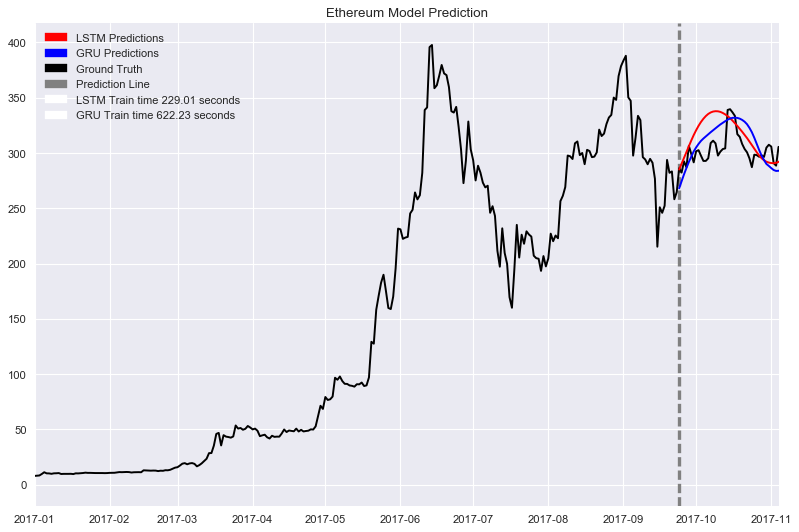

In [160]:
time1 = '2017-01-01'
time2 = '2017-11-04'
model_plot('Ethereum',pred_LSTM, pred_GRU, time1, time2, dataset,LSTM_time,GRU_time)

In [142]:
#Ripple LSTM
epoch = 50
batch = 56
dataset = pd.read_csv('rippledf.csv', index_col ='Date')
train_size = int(dataset.shape[0]*Train)
X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_LSTM(layers, Pred_days_ahead, X_train)

start = time.time()
model.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 0)
LSTM_time = time.time() - start
predictions_xrp_LSTM, ground_truth_xrp_LSTM, RMSE = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
print('Training time: {}'.format(LSTM_time))

The RMSE for Prediction is 0.21
Training time: 641.2868189811707


In [143]:
#Ripple GRU
epoch = 25
batch = 56
model = build_GRU(layers, Pred_days_ahead, X_train)

start = time.time()
model.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 0)
GRU_time = time.time() - start
predictions_xrp_GRU, ground_truth_xrp_GRU, RMSE = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
print('Training time: {}'.format(GRU_time))

The RMSE for Prediction is 0.22
Training time: 256.9734115600586


In [144]:
pred_LSTM = pad_shape(predictions_xrp_LSTM, train_size,Pred_days_ahead)
pred_GRU = pad_shape(predictions_xrp_GRU, train_size,Pred_days_ahead)

C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


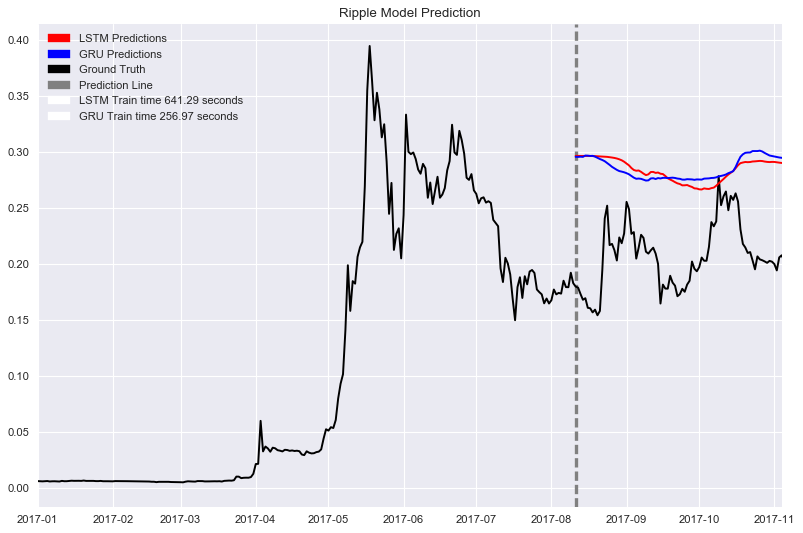

In [145]:
time1 = '2017-01-01'
time2 = '2017-11-04'
model_plot('Ripple',pred_LSTM, pred_GRU, time1, time2, dataset,LSTM_time, GRU_time)

In [154]:
#Bitcoin LSTM
epoch= 5
batch= 396

dataset = pd.read_csv('bitcoindf.csv', index_col ='Date')
train_size = int(dataset.shape[0]*Train)
X_train, y_train, inputs, ground_truth, scaler_features, scaler_label = preprocess_DATA(dataset, train_size, timestep, Pred_days_ahead)    
model = build_LSTM(layers, Pred_days_ahead, X_train)


start = time.time()
model.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 0)
LSTM_time = time.time() - start
predictions_btc_LSTM, ground_truth_btc_LSTM, RMSE = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
print('Training time: {}'.format(LSTM_time))

The RMSE for Prediction is 0.83
Training time: 82.24618625640869


In [155]:
#Bitcoin GRU
epoch= 50
batch= 56
model = build_GRU(layers, Pred_days_ahead, X_train)

start = time.time()
model.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 0)
GRU_time = time.time() - start
predictions_btc_GRU, ground_truth_btc_GRU, RMSE = predict_MODEL(inputs, scaler_label, Pred_days_ahead, timestep, model)
print('Training time: {}'.format(GRU_time))

The RMSE for Prediction is 0.76
Training time: 622.225004196167


In [156]:
pred_LSTM = pad_shape(predictions_btc_LSTM, train_size,Pred_days_ahead)
pred_GRU = pad_shape(predictions_btc_GRU, train_size,Pred_days_ahead)

C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
C:\Users\Dassy\Anaconda2\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


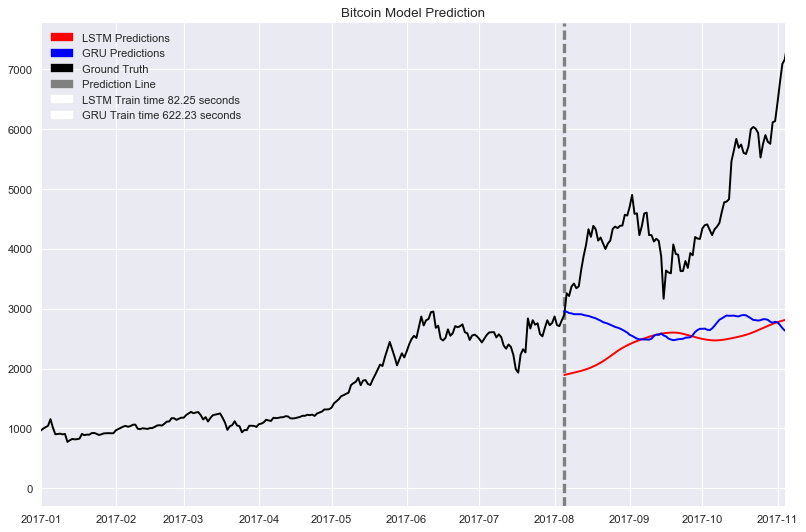

In [157]:
time1 = '2017-01-01'
time2 = '2017-11-04'
model_plot('Bitcoin',pred_LSTM, pred_GRU, time1, time2, dataset,LSTM_time, GRU_time)

In [107]:
scaled = MinMaxScaler(feature_range = (0,1))
curr={}
curr['XRP'] = pd.read_csv('rippledf.csv', index_col ='Date')
curr['ETHER'] = pd.read_csv('ethereumdf.csv', index_col ='Date')
curr['BTC'] = pd.read_csv('bitcoindf.csv', index_col ='Date')

for coin in curr: 
    curr[coin] = curr[coin].iloc[(int(curr[coin].shape[0]*0.94)):]                             
    curr[coin]['Close Price'] = scaled.fit_transform(curr[coin]['Close'])     # create a new y-col (optional)
    curr[coin]['x'] = np.arange(len(curr[coin]))
    


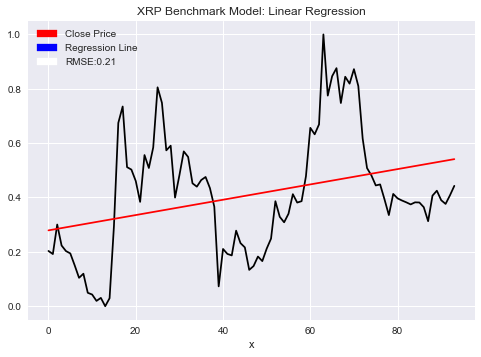

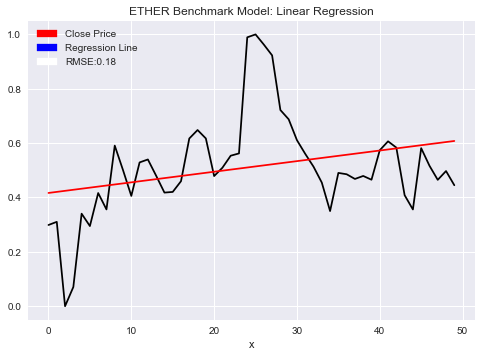

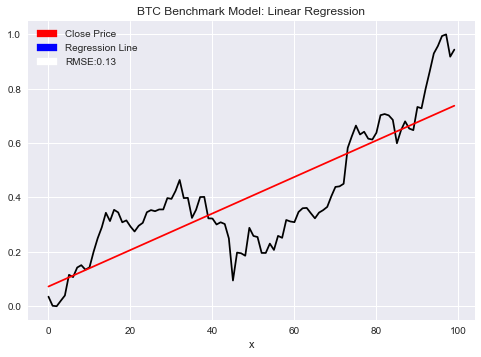

In [108]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
from math import sqrt
from sklearn.metrics import mean_squared_error
plt.figure(num=1, figsize=(4, 4), dpi=100)



for coin in curr:
    lm.fit(X=curr[coin]['x'].values[:, np.newaxis], y=curr[coin]['Close Price'].values[:, np.newaxis])
    curr[coin]['Regression Line'] = lm.predict(curr[coin]['x'].values[:, np.newaxis])
    curr[coin][['Close Price', 'Regression Line', 'x']].plot(x='x', color =['black','red'])
    RMSE = sqrt(mean_squared_error(curr[coin]['Close Price'], curr[coin]['Regression Line']))
    plt.title('{} Benchmark Model: Linear Regression'.format(coin))
    red_patch = mpatches.Patch(color='red', label='Close Price')
    black_patch = mpatches.Patch(color='black', label='Regression Line')
    x_patch = mpatches.Patch(color='white',label='RMSE:{:.2f}'.format(RMSE))
    plt.legend(handles=[red_patch,blue_patch,x_patch], loc=2)
    
    plt.show()